### Cycle Power Plant Data Set


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
ax =pd.read_csv('D:/Assignment/dataset/ax.csv')
ax

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
ax.shape

(9568, 5)

In [4]:
ax.isnull().any()

AT    False
V     False
AP    False
RH    False
PE    False
dtype: bool

In [5]:
ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
ax.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
ax.head(3)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [8]:
# X= ax.drop(['PE'],axis=1).values
# X.shape

In [9]:
X= ax.iloc[:,0:-1]
X.shape

(9568, 4)

In [10]:
# y=ax['PE']
# y.shape

In [11]:
y=ax.iloc[:,-1]
y.shape

(9568,)

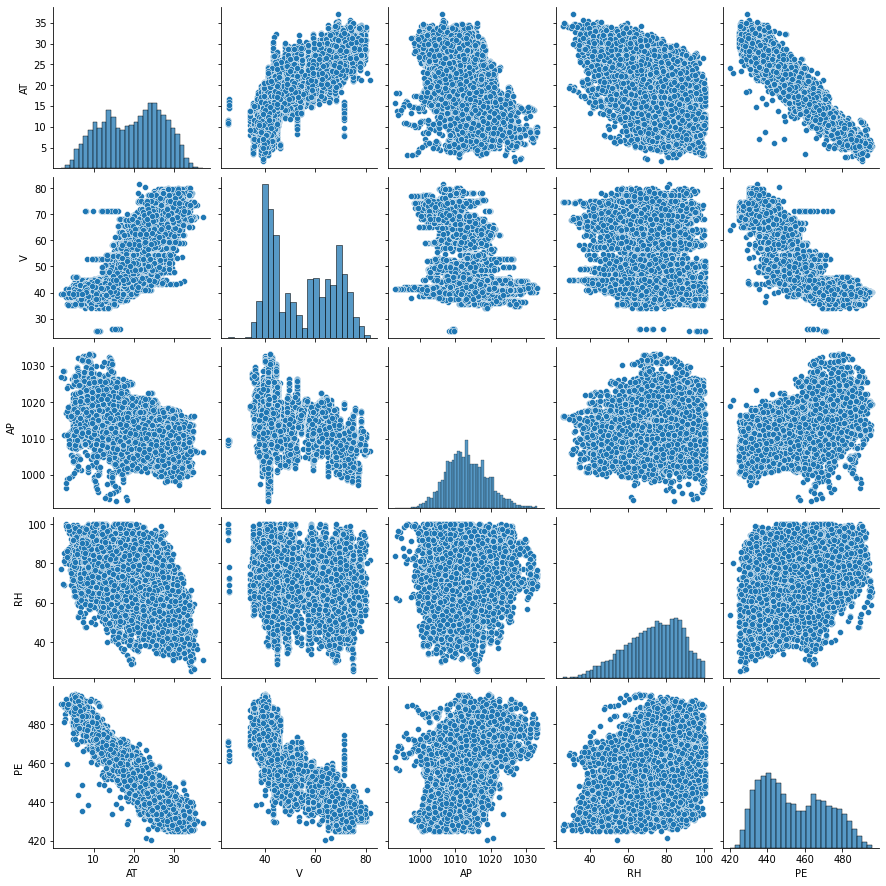

In [12]:
sns.pairplot(ax)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
(X_train)

,AT,V,AP,RH
9103,14.10,43.34,1012.91,86.45
6281,12.93,38.73,1006.41,89.24
6201,11.12,44.92,1025.58,93.52
2646,15.18,44.20,1019.60,72.45
3568,27.49,63.78,1015.43,47.45
...,...,...,...,...
2895,26.92,62.44,1011.09,70.80
7813,20.90,67.71,1007.16,59.02
905,18.59,39.54,1008.56,68.61
5192,22.96,45.01,1012.21,50.81


In [15]:
(X_test)

,AT,V,AP,RH
5014,17.93,44.63,1003.54,87.41
6947,16.34,42.28,1008.08,52.80
9230,25.97,70.32,1007.48,57.01
4290,6.77,38.18,1017.80,81.13
6477,8.64,39.69,1001.57,98.27
...,...,...,...,...
3854,26.89,70.32,1012.39,87.17
4785,21.93,61.45,1008.92,98.54
6406,21.55,44.58,1017.20,46.64
175,31.24,71.98,1004.66,57.17


In [16]:
lr= LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
lr.score(X_test,y_test)

0.9297935741511321

In [19]:
lr.intercept_

460.05727267468507

In [20]:
lr.coef_

array([-1.96865472, -0.2392946 ,  0.0568509 , -0.15861467])

In [21]:
y_pred = lr.predict(X_test)

In [22]:
pred_y = pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'differnce': y_test-y_pred})
pred_y[0:10]

,Actual value,Predicted value,differnce
5014,458.96,457.267224,1.692776
6947,463.29,466.707484,-3.417484
9230,435.27,440.337640,-5.067640
4290,484.31,482.587655,1.722345
6477,473.55,474.903590,-1.353590
6326,456.30,448.823695,7.476305
3224,436.02,440.116276,-4.096276
8700,488.75,478.081138,10.668862
6525,469.75,466.995640,2.754360
7258,482.83,479.496762,3.333238


In [23]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2_score:", r2_score(y_pred, y_test))
print("Mean_squared_error:", mean_squared_error(y_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

R2_score: 0.9236485569803989
Mean_squared_error: 20.83719154722035
RMSE: 4.564777272465805
